<h1>Column Descriptions</h1>

<ol>

<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>

</ol>






In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Areas = pd.read_csv('Areas.csv', sep='\t')
Current = pd.read_csv('Current_Data.csv', sep='\t')
Items = pd.read_csv('Items.csv', sep='\t')
Periods = pd.read_csv('Period_Names.csv', sep='\t')
Series = pd.read_csv('Series.csv', sep='\t')

# I cleaned the data and made the appropriate merges (there is WHITESPACE ** Make Sure To Clean Whitespace) **

complete_df = pd.merge(Series, Areas, on='area_code').merge(Current, on='series_id        ').merge(Items, on='item_code').merge(Periods, on='period')
complete_df = complete_df.rename(columns = {'series_id        ': 'series_id', '       value': 'value'})
complete_df['series_id'] = complete_df['series_id'].str.strip()
complete_df['value'] = complete_df['value'].str.strip()

complete_df

# Dropping the appropriate columns

complete_df.drop(['footnote_codes_x', 'footnote_codes_y', 'series_title', 'series_id', 'area_code', 'period', 'period_abbr', 'begin_year', 'begin_period', 'end_year', 'end_period'], axis=1, inplace=True)

# Dropping certain 'value' rows containing the hyphen (-) as filler

condition = complete_df[complete_df['value'] == '-'].index
complete_df.drop(condition, axis=0, inplace=True) 

# Changing Certain Data Types from Strings to Float, Int, or DateTime

complete_df['value'] = complete_df['value'].astype(float)
complete_df.info()

complete_df

<class 'pandas.core.frame.DataFrame'>
Index: 191077 entries, 0 to 191084
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   item_code    191077 non-null  object 
 1   area_name    191077 non-null  object 
 2   year         191077 non-null  int64  
 3   value        191077 non-null  float64
 4   item_name    191077 non-null  object 
 5   period_name  191077 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.2+ MB


,item_code,area_name,year,value,item_name,period_name
0,701111,U.S. city average,1995,0.238,"Flour, white, all purpose, per lb. (453.6 gm)",January
1,701111,U.S. city average,1996,0.262,"Flour, white, all purpose, per lb. (453.6 gm)",January
2,701111,U.S. city average,1997,0.309,"Flour, white, all purpose, per lb. (453.6 gm)",January
3,701111,U.S. city average,1998,0.299,"Flour, white, all purpose, per lb. (453.6 gm)",January
4,701111,U.S. city average,1999,0.297,"Flour, white, all purpose, per lb. (453.6 gm)",January
...,...,...,...,...,...,...
191080,FS1101,U.S. city average,2020,3.533,"Butter, stick, per lb. (453.6 gm)",December
191081,FS1101,U.S. city average,2021,3.474,"Butter, stick, per lb. (453.6 gm)",December
191082,FS1101,West,2021,3.772,"Butter, stick, per lb. (453.6 gm)",December
191083,703611,Northeast,1995,3.315,"Steak, sirloin, USDA Choice, bone-in, per lb. ...",December


In [82]:
complete_df.columns

Index(['item_code', 'area_name', 'year', 'value', 'item_name', 'period_name'], dtype='object')

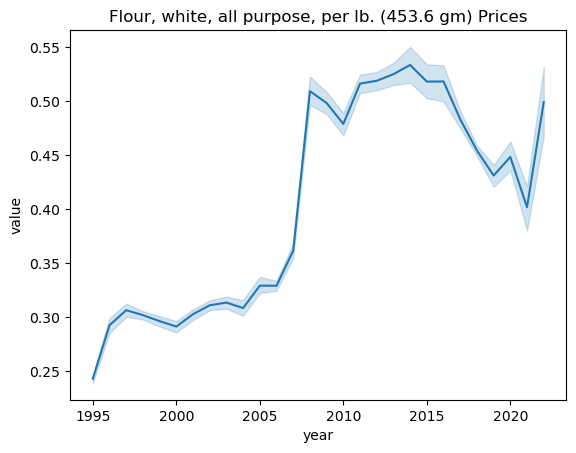

In [93]:
def getCategory(item_code):
    category = complete_df[complete_df['item_code'] == item_code]
    lineplot = sns.lineplot(x='year', y='value', data=category)
    plt.title(category['item_name'].unique()[0] + " Prices")

getCategory('701111')